In [1]:
import numpy as np
from Ising_Model_Fast import *
from numba import njit

# Params

In [9]:
seed = 3157

N = 128
J1 = 0.5
J2 = 1.0
MC_steps = 50_000
save_images = False
images_spacing = np.array([0, 1])

In [10]:
np.random.seed(seed)
lattice = np.random.choice([-1, 1], size=(N, N))
energy = get_energy(lattice, N, J1, J2)

lattice_p = np.random.choice([-1, 1], size=(N, N), p=[0.25, 0.75])
lattice_n = np.random.choice([-1, 1], size=(N, N), p=[0.75, 0.25])

energy_p = get_energy(lattice_p, N, J1, J2)
energy_n = get_energy(lattice_n, N, J1, J2)

In [4]:
def get_M_E_C_of_T(lattice, energy, Ts, simulation_params, use_last=1000, burn_in=0.1):
    """
    Calculate the average magnetization, energy, and heat capacity for a range of temperatures.
    """
    avg_mags = np.empty(len(Ts), dtype=np.float32)
    avg_energies = np.empty(len(Ts), dtype=np.float32)
    heat_capacities = np.empty(len(Ts), dtype=np.float32)

    for i, T in enumerate(Ts):
        simulation_params['T'] = T
        print("="*20)
        print(f"Starting Simulation for T = {T:.2f}")
        print("="*20)
        
        mags, energies, _, _ = metropolis(lattice=lattice, energy=energy, **simulation_params)

        avg_mags[i] = np.mean(mags[-use_last:])
        avg_energies[i] = np.mean(energies[-use_last:])
        heat_capacities[i] = compute_specific_heat(energies[-use_last:], N, T, burn_in=burn_in)

    return avg_mags, avg_energies, heat_capacities

In [11]:
def get_M_E_C_of_T_parallel(lattice, energy, Ts, N, J1, J2, MC_steps, seed, use_last=1000, burn_in=0.1):
    """
    Calculate the average magnetization, energy, and heat capacity for a range of temperatures.
    """
    avg_mags = np.empty(len(Ts), dtype=np.float32)
    avg_energies = np.empty(len(Ts), dtype=np.float32)
    heat_capacities = np.empty(len(Ts), dtype=np.float32)

    for i, T in enumerate(Ts):
        print('Simulation for T =', T)
        mags, energies, _ = metropolis_large(lattice=lattice, energy=energy, N=N, T=T, J1=J1, J2=J2, MC_steps=MC_steps, seed=seed)

        avg_mags[i] = np.mean(mags[-use_last:])
        avg_energies[i] = np.mean(energies[-use_last:])
        heat_capacities[i] = compute_specific_heat(energies[-use_last:], N, T, burn_in=burn_in)

    return avg_mags, avg_energies, heat_capacities

In [13]:
betas = np.arange(0.1, 2, 0.05)
temps = np.linspace(2, 6, 10)
use_last = 10000

In [14]:
mags_parallel, energies_parallel, heat_capacities_parallel = get_M_E_C_of_T_parallel(
	lattice, energy, temps, N, J1, J2, MC_steps, seed, use_last=use_last, burn_in=0.1
)

Simulation for T = 2.0
Simulation for T = 2.4444444444444446
Simulation for T = 2.888888888888889
Simulation for T = 3.333333333333333
Simulation for T = 3.7777777777777777
Simulation for T = 4.222222222222222
Simulation for T = 4.666666666666666
Simulation for T = 5.111111111111111
Simulation for T = 5.555555555555555
Simulation for T = 6.0


In [14]:
betas = np.arange(0.1, 2, 0.05)
temps = 1 / betas
use_last = 10000

mags_p, energies_p, heat_capacities_p = get_M_E_C_of_T(lattice_p, energy_p, temps, simulation_params)
mags_n, energies_n, heat_capacities_n = get_M_E_C_of_T(lattice_n, energy_n, temps, simulation_params)

Starting Simulation for T = 10.00
Starting Simulation for T = 6.67
Starting Simulation for T = 5.00
Starting Simulation for T = 4.00
Starting Simulation for T = 3.33
Starting Simulation for T = 2.86
Starting Simulation for T = 2.50
Starting Simulation for T = 2.22
Starting Simulation for T = 2.00
Starting Simulation for T = 1.82
Starting Simulation for T = 1.67
Starting Simulation for T = 1.54
Starting Simulation for T = 1.43
Starting Simulation for T = 1.33
Starting Simulation for T = 1.25
Starting Simulation for T = 1.18
Starting Simulation for T = 1.11
Starting Simulation for T = 1.05
Starting Simulation for T = 1.00
Starting Simulation for T = 0.95
Starting Simulation for T = 0.91
Starting Simulation for T = 0.87
Starting Simulation for T = 0.83
Starting Simulation for T = 0.80
Starting Simulation for T = 0.77
Starting Simulation for T = 0.74
Starting Simulation for T = 0.71
Starting Simulation for T = 0.69
Starting Simulation for T = 0.67
Starting Simulation for T = 0.65
Starting 

In [15]:
simulation_params_cls = simulation_params.copy()
simulation_params_cls['J1'] = 1.0
simulation_params_cls['J2'] = 0.0

mags_cls_p, energies_cls_p, heat_capacities_cls_p = get_M_E_C_of_T(lattice_p, energy, temps, simulation_params_cls)
mags_cls_n, energies_cls_n, heat_capacities_cls_n = get_M_E_C_of_T(lattice_n, energy, temps, simulation_params_cls)

Starting Simulation for T = 10.00
Starting Simulation for T = 6.67
Starting Simulation for T = 5.00
Starting Simulation for T = 4.00
Starting Simulation for T = 3.33
Starting Simulation for T = 2.86
Starting Simulation for T = 2.50
Starting Simulation for T = 2.22
Starting Simulation for T = 2.00
Starting Simulation for T = 1.82
Starting Simulation for T = 1.67
Starting Simulation for T = 1.54
Starting Simulation for T = 1.43
Starting Simulation for T = 1.33
Starting Simulation for T = 1.25
Starting Simulation for T = 1.18
Starting Simulation for T = 1.11
Starting Simulation for T = 1.05
Starting Simulation for T = 1.00
Starting Simulation for T = 0.95
Starting Simulation for T = 0.91
Starting Simulation for T = 0.87
Starting Simulation for T = 0.83
Starting Simulation for T = 0.80
Starting Simulation for T = 0.77
Starting Simulation for T = 0.74
Starting Simulation for T = 0.71
Starting Simulation for T = 0.69
Starting Simulation for T = 0.67
Starting Simulation for T = 0.65
Starting 

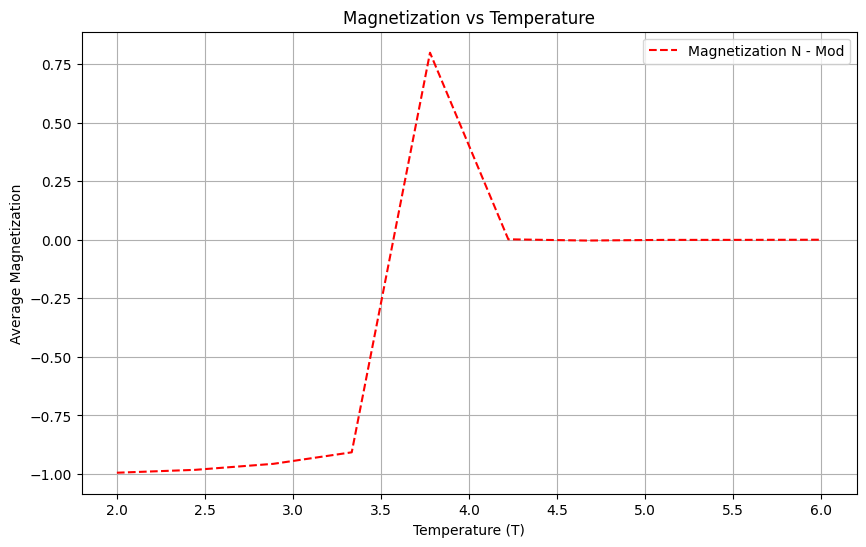

In [15]:
plt.figure(figsize=(10, 6))
plt.title('Magnetization vs Temperature')
plt.plot(temps, mags_parallel, 'r--', label='Magnetization N - Mod')
# plt.plot(temps, mags_p, 'r:', label='Magnetization P - Mod')
# plt.plot(temps, mags_cls_n, 'g--', label='Magnetization N - Cls')
# plt.plot(temps, mags_cls_p, 'g:', label='Magnetization P - Cls')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization')
plt.legend(loc='upper right')
plt.grid()

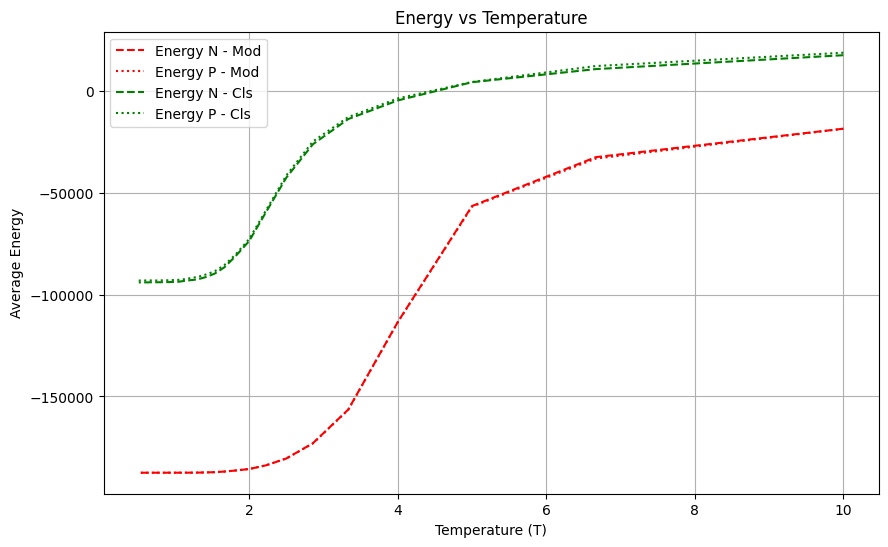

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Energy vs Temperature')
plt.plot(temps, energies_n, 'r--', label='Energy N - Mod')
# plt.plot(temps, energies_p, 'r:', label='Energy P - Mod')
# plt.plot(temps, energies_cls_n, 'g--', label='Energy N - Cls')
# plt.plot(temps, energies_cls_p, 'g:', label='Energy P - Cls')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Energy')
plt.legend(loc='upper left')
plt.grid()

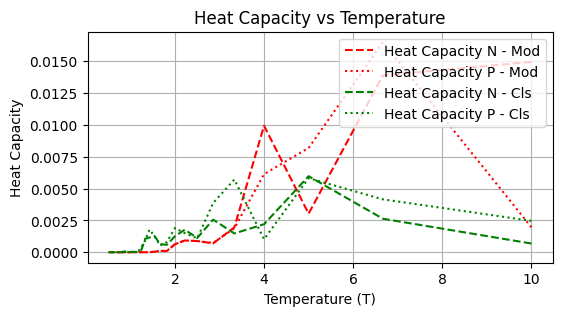

In [18]:
plt.figure(figsize=(6, 3))
plt.title('Heat Capacity vs Temperature')
plt.plot(temps, heat_capacities_n, 'r--', label='Heat Capacity N - Mod')
plt.plot(temps, heat_capacities_p, 'r:', label='Heat Capacity P - Mod')
plt.plot(temps, heat_capacities_cls_n, 'g--', label='Heat Capacity N - Cls')
plt.plot(temps, heat_capacities_cls_p, 'g:', label='Heat Capacity P - Cls')
plt.legend(loc='upper right')
plt.xlabel('Temperature (T)')
plt.ylabel('Heat Capacity')
plt.grid()